In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
df_binary = pd.read_csv("../cleaned_datasets/cleaned_news_binary.csv")
df_multinomial = pd.read_csv("../cleaned_datasets/cleaned_news_multinomial.csv")

In [5]:
df_binary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57676 entries, 0 to 57675
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    57676 non-null  object
 1   label   57676 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 901.3+ KB


In [6]:
df_multinomial['label'].unique()

array([1, 0, 3, 5, 4, 2], dtype=int64)

In [8]:
print(df_multinomial.isna().sum())
print(df_binary.isna().sum())

text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


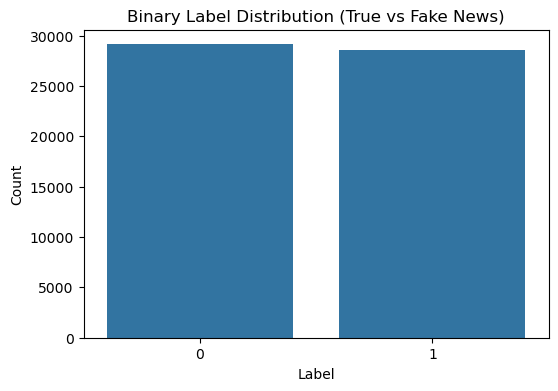

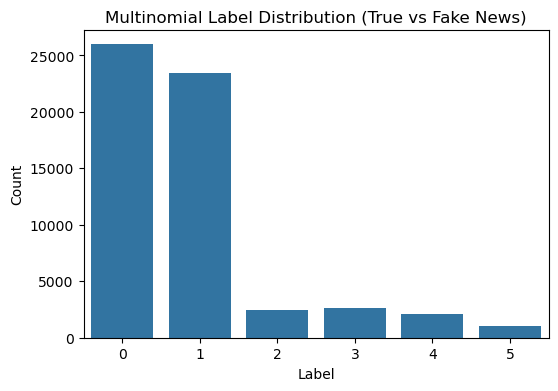

In [9]:
# Plot label distribution

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df_binary)
plt.title("Binary Label Distribution (True vs Fake News)")
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df_multinomial)
plt.title("Multinomial Label Distribution (True vs Fake News)")
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

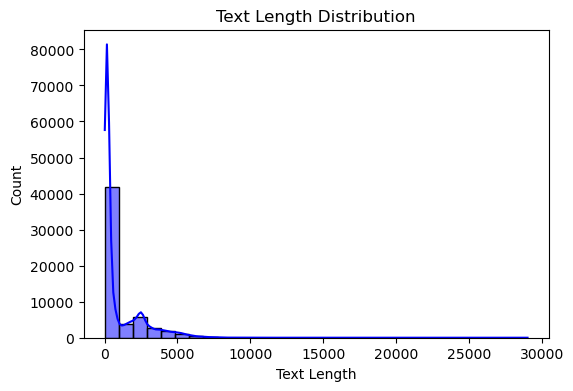

In [11]:
# Plot text length distribution
df_binary['text_length'] = df_binary['text'].apply(lambda x: len(str(x)))
plt.figure(figsize=(6, 4))
sns.histplot(df_binary['text_length'], kde=True, color='blue', bins=30)
plt.title("Text Length Distribution")
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

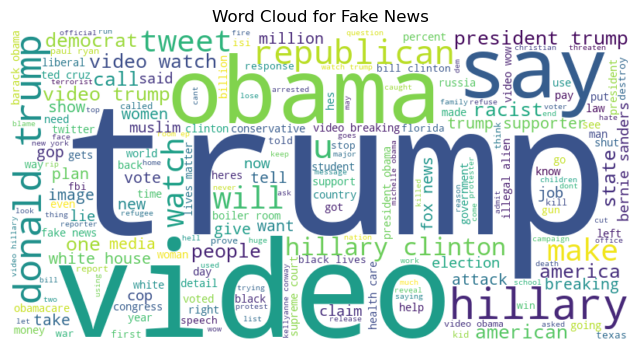

In [12]:
# Word cloud for the 'fake' news
fake_news_text = " ".join(df_binary[df_binary['label'] == 0]['text'])
plt.figure(figsize=(8, 6))
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news_text)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title("Word Cloud for Fake News")
plt.axis('off')
plt.show()

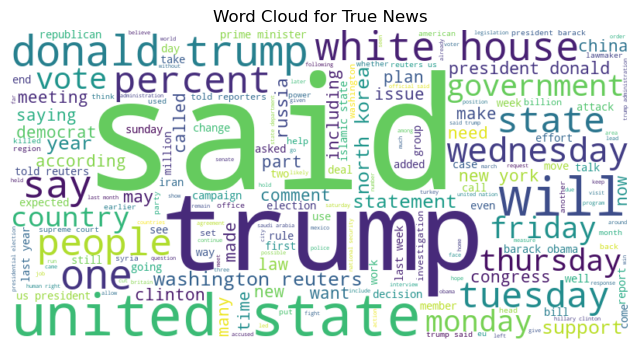

In [13]:
# Word cloud for the 'true' news
true_news_text = " ".join(df_binary[df_binary['label'] == 1]['text'])
plt.figure(figsize=(8, 6))
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_news_text)
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title("Word Cloud for True News")
plt.axis('off')
plt.show()